📁 'visuals' folder created successfully!
✅ Dataset Loaded Successfully!
Rows: 2000 | Columns: 23

📋 Columns after cleaning:
 ['sessionstart', 'customerid', 'fullname', 'gender', 'age', 'creditscore', 'monthlyincome', 'country', 'state', 'city', 'category', 'product', 'cost', 'price', 'quantity', 'campaignschema', 'cartadditiontime', 'orderconfirmation', 'orderconfirmationtime', 'paymentmethod', 'sessionend', 'orderreturn', 'returnreason']

💾 Cleaned dataset saved as cleaned_customer360.csv


/tmp/ipython-input-4060850722.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['orderreturn'] = df['orderreturn'].fillna(False)


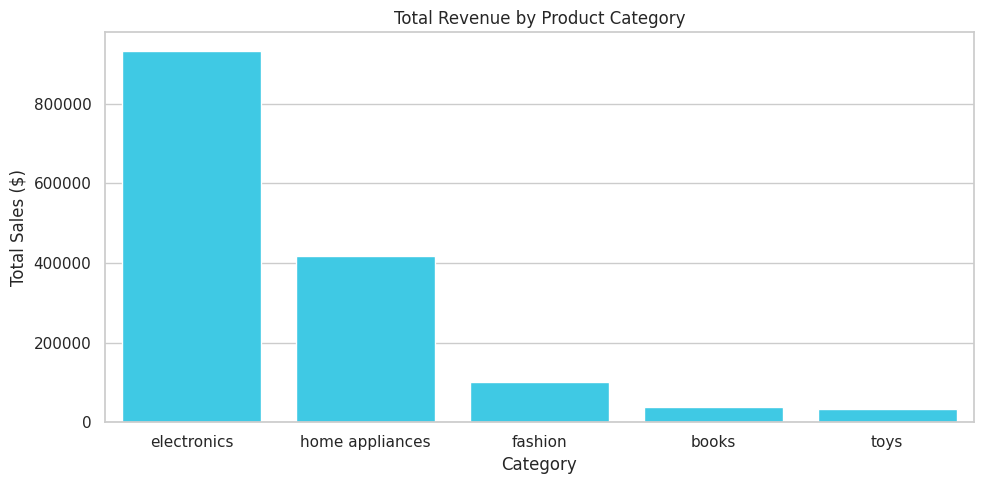

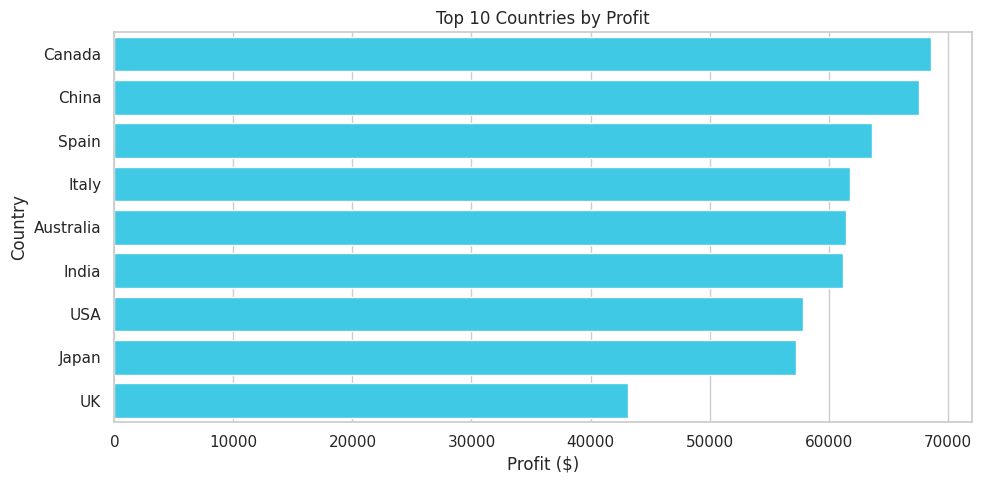

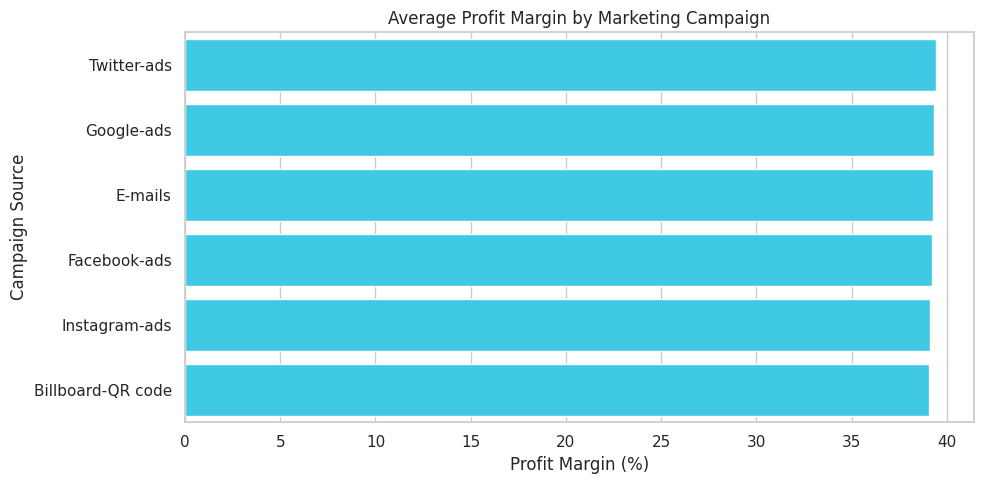

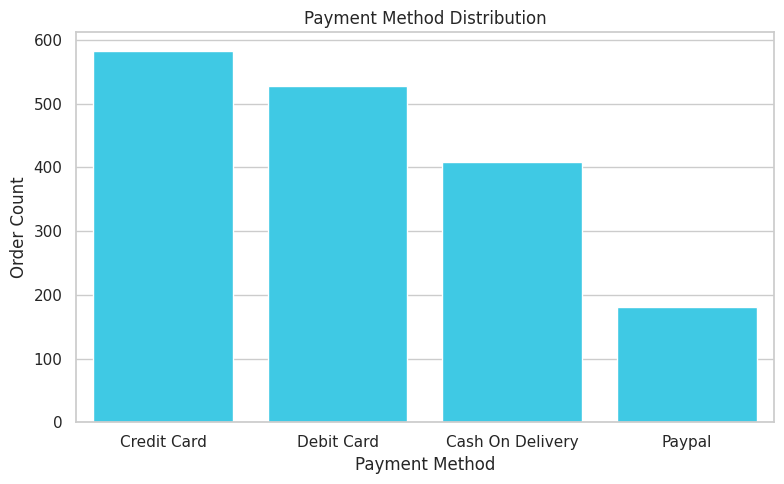

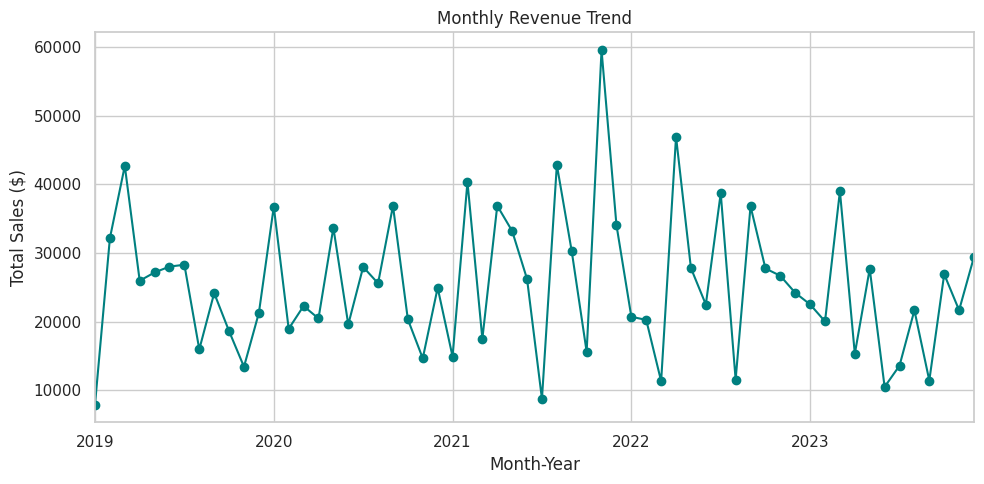


🎯 PROJECT INSIGHTS:
- Dataset cleaned and enriched with sales & profit metrics.
- Revenue, profit, and margin calculated for each transaction.
- Visualized product, country, and marketing performance.
- Prepared dataset ready for Power BI Dashboard integration.
- ✅ Cleaned file: cleaned_customer360.csv


In [4]:
# =======================================================
# 🧠 Business 360° Analytics - ETL + EDA (Customer 360 Insights)
# =======================================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =======================================================
# 🗂️ Create "visuals" folder if it doesn't exist
# =======================================================
if not os.path.exists("visuals"):
    os.makedirs("visuals")
    print("📁 'visuals' folder created successfully!")
else:
    print("📁 'visuals' folder already exists!")

# Step 2: Load Dataset
df = pd.read_csv("Customer360Insights.csv", encoding='latin1')
print("✅ Dataset Loaded Successfully!")
print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")

# Step 3: Clean Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("\n📋 Columns after cleaning:\n", df.columns.tolist())

# Step 4: Handle Missing Values
df = df.copy()
df['returnreason'] = df['returnreason'].fillna('No Return')
df['orderreturn'] = df['orderreturn'].fillna(False)
df['monthlyincome'] = df['monthlyincome'].fillna(df['monthlyincome'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['creditscore'] = df['creditscore'].fillna(df['creditscore'].median())

# Step 5: Feature Engineering
df['total_sales'] = df['price'] * df['quantity']
df['profit'] = (df['price'] - df['cost']) * df['quantity']
df['profit_margin_%'] = np.where(df['total_sales'] > 0, (df['profit'] / df['total_sales']) * 100, 0)
df['sessionstart'] = pd.to_datetime(df['sessionstart'], errors='coerce')
df['orderconfirmationtime'] = pd.to_datetime(df['orderconfirmationtime'], errors='coerce')
df['sessionend'] = pd.to_datetime(df['sessionend'], errors='coerce')
df['orderprocessing_time_min'] = (df['orderconfirmationtime'] - df['sessionstart']).dt.total_seconds() / 60

# Step 6: Save Cleaned Dataset
df.to_csv("cleaned_customer360.csv", index=False)
print("\n💾 Cleaned dataset saved as cleaned_customer360.csv")

# =======================================================
# 📊 Exploratory Data Analysis (EDA)
# =======================================================
sns.set(style="whitegrid", palette="cool")

# 1️⃣ Revenue by Category
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Revenue by Product Category")
plt.ylabel("Total Sales ($)")
plt.xlabel("Category")
plt.tight_layout()
plt.savefig("visuals/revenue_by_category.png")
plt.show()

# 2️⃣ Profit by Country
country_profit = df.groupby('country')['profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_profit.values, y=country_profit.index)
plt.title("Top 10 Countries by Profit")
plt.xlabel("Profit ($)")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("visuals/profit_by_country.png")
plt.show()

# 3️⃣ Average Profit Margin by Marketing Campaign
campaign_margin = df.groupby('campaignschema')['profit_margin_%'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=campaign_margin.values, y=campaign_margin.index)
plt.title("Average Profit Margin by Marketing Campaign")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Campaign Source")
plt.tight_layout()
plt.savefig("visuals/campaign_margin.png")
plt.show()

# 4️⃣ Payment Method Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='paymentmethod', data=df, order=df['paymentmethod'].value_counts().index)
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Order Count")
plt.tight_layout()
plt.savefig("visuals/payment_distribution.png")
plt.show()

# 5️⃣ Monthly Revenue Trend
df['month_year'] = df['sessionstart'].dt.to_period('M')
monthly_revenue = df.groupby('month_year')['total_sales'].sum()
plt.figure(figsize=(10,5))
monthly_revenue.plot(marker='o', color='teal')
plt.title("Monthly Revenue Trend")
plt.ylabel("Total Sales ($)")
plt.xlabel("Month-Year")
plt.tight_layout()
plt.savefig("visuals/monthly_revenue_trend.png")
plt.show()

# =======================================================
# 🎯 Insights Summary
# =======================================================
print("\n🎯 PROJECT INSIGHTS:")
print("- Dataset cleaned and enriched with sales & profit metrics.")
print("- Revenue, profit, and margin calculated for each transaction.")
print("- Visualized product, country, and marketing performance.")
print("- Prepared dataset ready for Power BI Dashboard integration.")
print("- ✅ Cleaned file: cleaned_customer360.csv")
